In [1]:
import os
import sys

cwd = os.getcwd()
sys.path.insert(0, cwd + "/src")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def plot_as_graph(tree, ax=None, annotate=False, highlight=None):
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    G = nx.DiGraph()
    G.add_edges_from([(node.idx, node.parent.idx) for node in tree._nodes if node.parent is not None])
    pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
    
    highlight = highlight or []
    highlight_ids = {node.idx for node in highlight}
    node_colors = ['orange' if node_idx in highlight_ids else 'skyblue' for node_idx in G.nodes()]
    
    node_size = 1000
    nx.draw(G, pos, with_labels=annotate, node_size=node_size, node_color=node_colors, ax=ax)

In [3]:
from dendrotweaks.morphology.io.factory import TreeFactory, SWCReader
from dendrotweaks.morphology.io.validation import validate_tree

In [4]:
file_name = 'Park_2019.swc'
# file_name = 'Smith_2013_cat.swc'
file_name ='CA1_Attila.swc'
file_name = 'ball-and-stick.swc'

path_to_swc = os.path.join(cwd, "data", file_name.replace('.swc', ''), "swc")
path_to_file = os.path.join(path_to_swc,file_name)

In [5]:
factory = TreeFactory()
reader = SWCReader()

In [6]:
df = reader.read_file(path_to_file)

In [7]:
df.head()

,Index,Type,X,Y,Z,R,Parent
0,1,1,0,0,0,10.0,-1
1,2,1,-10,0,0,10.0,1
2,3,1,10,0,0,10.0,1
3,4,3,-10,-10,0,2.0,1
4,5,3,-100,-100,0,2.0,4


In [8]:
# Show the summary statistics of the coordinates
df[['X', 'Y', 'Z']].describe()

,X,Y,Z
count,17.00000,17.000000,17.0
mean,0.00000,175.882353,0.0
std,93.67497,220.001671,0.0
min,-200.00000,-100.000000,0.0
25%,-10.00000,0.000000,0.0
50%,0.00000,100.000000,0.0
75%,10.00000,400.000000,0.0
max,200.00000,500.000000,0.0


In [9]:
# Show min and max idx for each node type
df.groupby('Type').agg({'Index': ['min', 'max']})

Index    
       min max
Type          
1        1   3
3        4   7
4        8  17

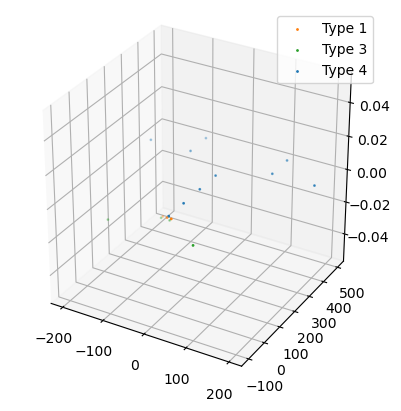

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', aspect='equal')

reader.plot_raw_data(df, ax)

# SWC Tree

## Connect

We will now use the dataframe to create the tree representation of the cell.

In [11]:
point_tree = factory.create_point_tree(df)

Connecting tree.
Removed 0 overlapping nodes.
  Elapsed time: 0.0 seconds
Tree already sorted.
  Elapsed time: 0.0 seconds


## Sort

We now want to make sure that the nodes are properly sorted. For this we will perform depth-first traversal of the tree and update a node's index as we visit the node.

In [12]:
point_tree.sort()

Tree already sorted.
  Elapsed time: 0.0 seconds


In [13]:
validate_tree(point_tree)

Tree has a unique root node •0
Tree is well connected
Tree has no loops
Tree is binary (not considering the root node)
Tree is sorted

Tree validation passed successfully


In [14]:
point_tree

Tree [•0, •1, •2, •3, •4, •5, •6, •7, •8, •9, •10, •11, •12, •13, •14, •15, •16]

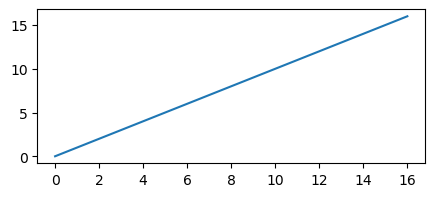

In [15]:
plt.figure(figsize=(5, 2))
plt.plot([node.idx for node in point_tree._nodes])

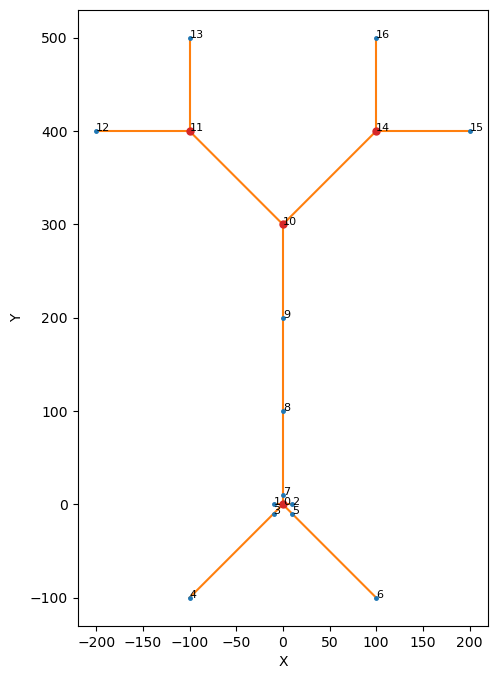

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
point_tree.plot(ax, edges=True, projection='XY', 
              annotate=True, highlight=point_tree.bifurcations)

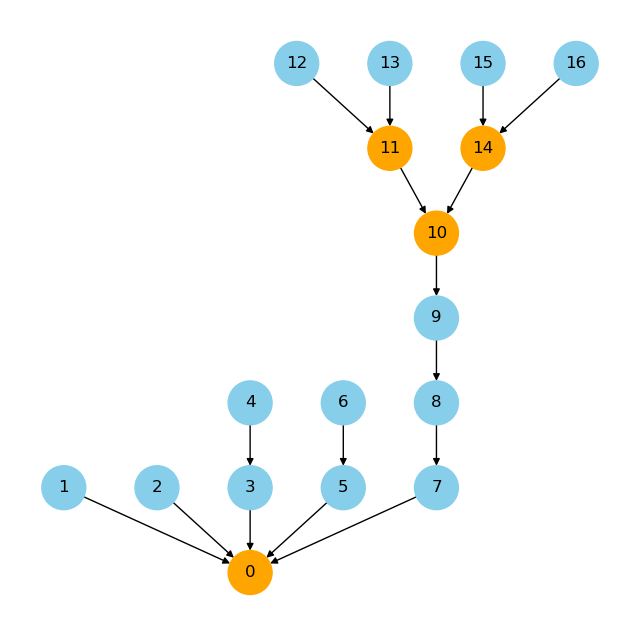

In [17]:
fix, ax = plt.subplots(figsize=(8, 8))
plot_as_graph(point_tree, ax, annotate=True, highlight=point_tree.bifurcations)

In [18]:
sec_tree = factory.create_sec_tree(point_tree)

Extended 6 nodes.
  Elapsed time: 0.0 seconds
Connecting tree.


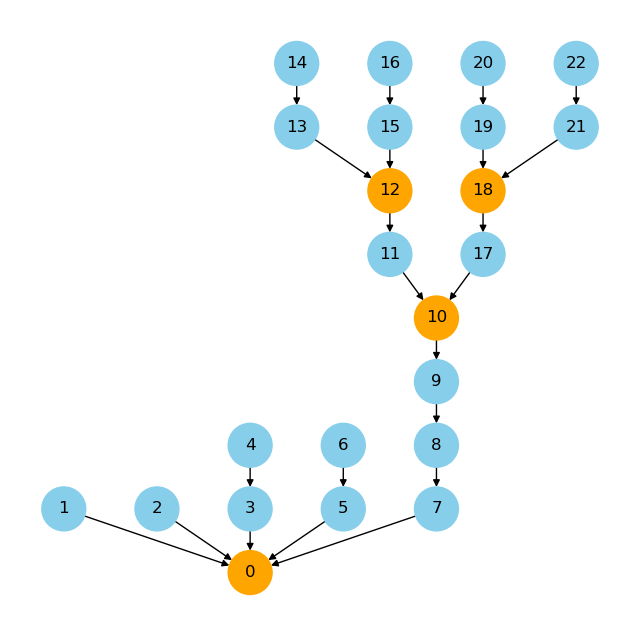

In [20]:
fix, ax = plt.subplots(figsize=(8, 8))
plot_as_graph(point_tree, ax, annotate=True, highlight=point_tree.bifurcations)

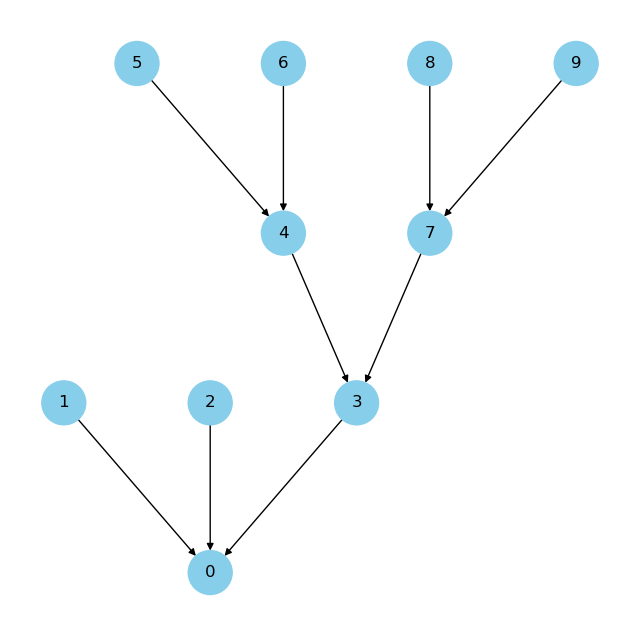

In [21]:
fix, ax = plt.subplots(figsize=(8, 8))
plot_as_graph(sec_tree, ax, annotate=True)

In [20]:
# point_tree.topology()

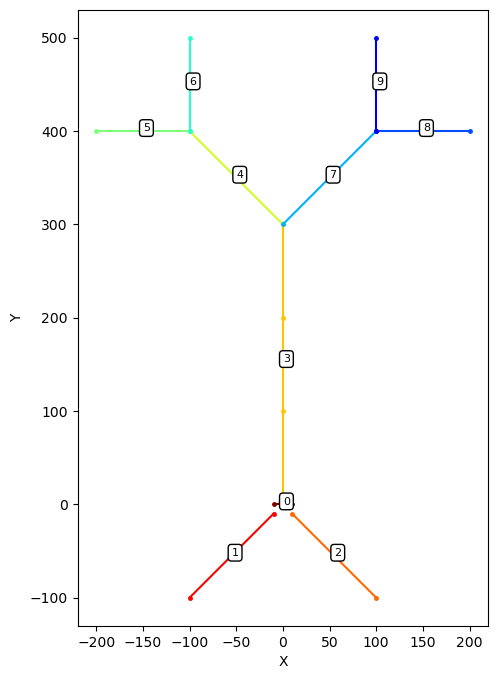

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
sec_tree.plot(projection='XY', show_points=True, annotate=True, ax=ax)

In [23]:
validate_tree(point_tree)

Tree has a unique root node •0
Tree is well connected
Tree has no loops
Tree is binary (not considering the root node)
Tree is sorted

Tree validation passed successfully


In [24]:
validate_tree(sec_tree)

Tree has a unique root node ••0
Tree is well connected
Tree has no loops
Tree is binary (not considering the root node)
Tree is sorted

Tree validation passed successfully


## Modifying the topology

In [18]:
point_tree.reposition_subtree(point_tree[14], point_tree[10])

In [19]:
node = point_tree[11]

In [20]:
point_tree.remove_node(node)

In [21]:
point_tree[12].info()

Node 13:
  Type: apic
  Coordinates: (-100.0, 500.0, 0.0)
  Radius: 0.25
  Parent: 10
  Children: []
  Siblings: [14, 12]
  Section: None


In [22]:
point_tree.insert_node_before(node, point_tree[12])

In [23]:
point_tree.sort()

  Elapsed time: 0.0 seconds


## Shift and rotate

In [24]:
point_tree.soma_center, point_tree.apical_center

(array([0., 0., 0.]), array([  0., 321.,   0.]))

In [25]:
point_tree.df

,idx,type_idx,x,y,z,r,parent_idx
0,0,1.0,0.0,0.0,0.0,10.00,-1
1,1,1.0,-10.0,0.0,0.0,10.00,0
2,2,1.0,10.0,0.0,0.0,10.00,0
3,3,3.0,-10.0,-10.0,0.0,2.00,0
4,4,3.0,-100.0,-100.0,0.0,2.00,3
5,5,3.0,10.0,-10.0,0.0,2.00,0
6,6,3.0,100.0,-100.0,0.0,2.00,5
7,7,4.0,0.0,10.0,0.0,2.00,0
8,8,4.0,0.0,100.0,0.0,2.00,7
9,9,4.0,0.0,200.0,0.0,1.00,8


In [26]:
point_tree.shift_coordinates_to_soma_center()

In [27]:
point_tree.align_apical_dendrite(axis='Y', facing='up')

Apical dendrite is already aligned.


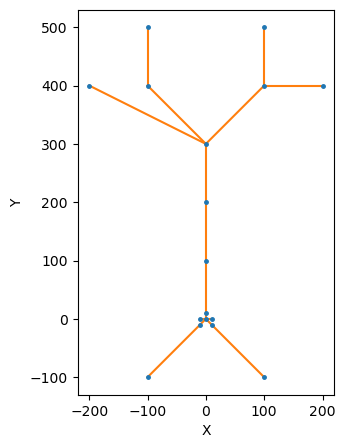

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
point_tree.plot(ax, edges=True, annotate=False, projection='XY')
# swcm.point_tree.rotate(45, axis='Y')


In [29]:
point_tree.soma_notation

'3PS'

# Section tree

In [50]:
sec_tree = factory.create_sec_tree(point_tree, extend=True)

Sections are already extended.
Connecting tree.


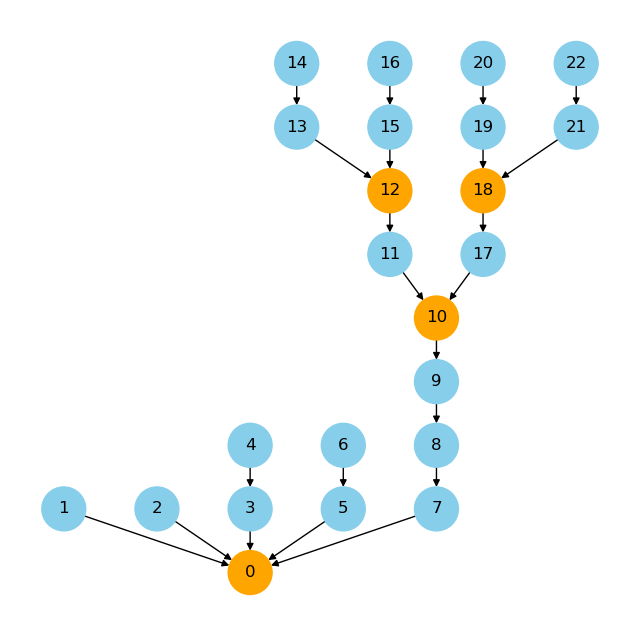

In [51]:
fix, ax = plt.subplots(figsize=(8, 8))
plot_as_graph(point_tree, ax, annotate=True, highlight=point_tree.bifurcations)

In [44]:
sec_tree.soma.points

[•1, •0, •2]

In [45]:
sec_tree[3].distance_to_root(1)

290.0

In [46]:
point_tree.sort()

Tree already sorted.
  Elapsed time: 0.0 seconds


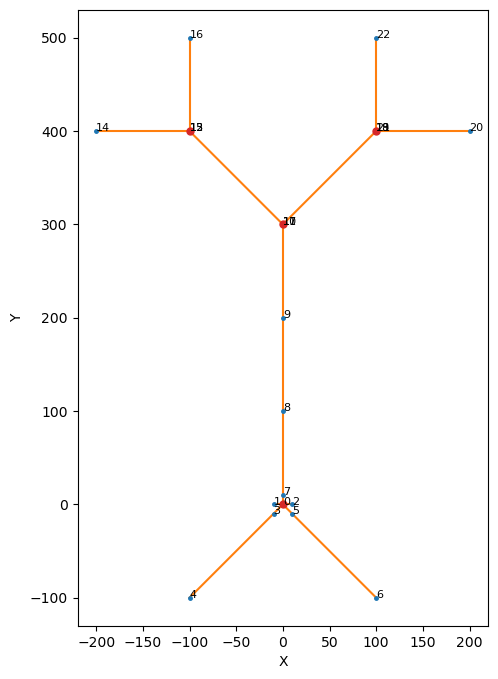

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))
point_tree.plot(ax, edges=True, projection='XY', 
              annotate=True, highlight=point_tree.bifurcations)

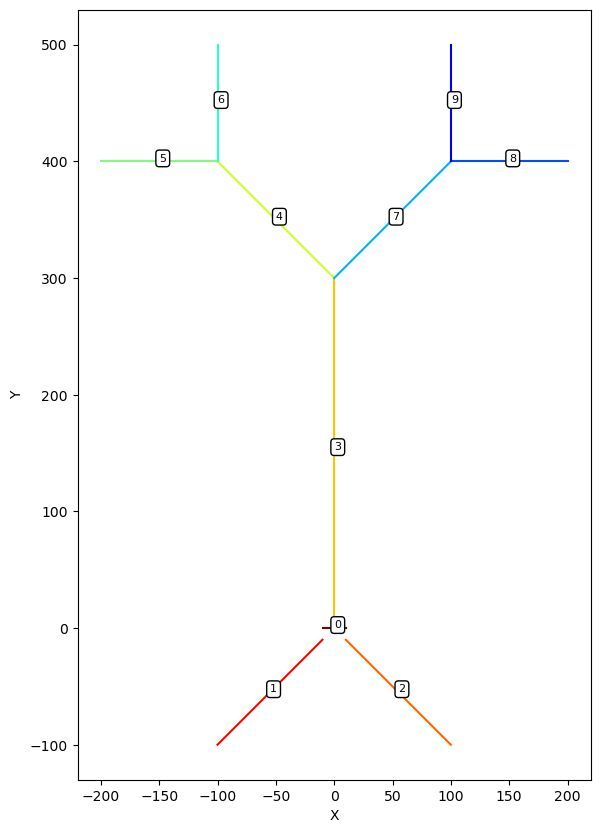

In [53]:
sec_tree.plot(projection='XY', annotate=True)

Not that we have set the `extend` flag to False and we will do extension manually for the purpose of this tutorial.

## Extending sections (manually)

Let's now visualize an arbitrary section (blue) and its parent section (orange). As you might notice the section appears detached from its parent. This is typical for SWC files, however, for our model we will need to recover this missing point. We can do it with extend section method.

WARNING: Note that we are using the hidden `point_tree._sections` attribute only to explain the underlying algorithm. You shouln't use it at this stage because the sections have not been assigned `children` attribute. To work with sections we will further build a properly connected `SectionTree` instance.

In [33]:
selected_section = sec_tree.sections[1] #17

In [34]:
selected_section.points[0].df

,idx,type_idx,x,y,z,r,parent_idx
0,3,3.0,-10.0,-10.0,0.0,2.0,0


In [35]:
selected_section.parent.points[-1].df

,idx,type_idx,x,y,z,r,parent_idx
0,2,1.0,10.0,0.0,0.0,10.0,0


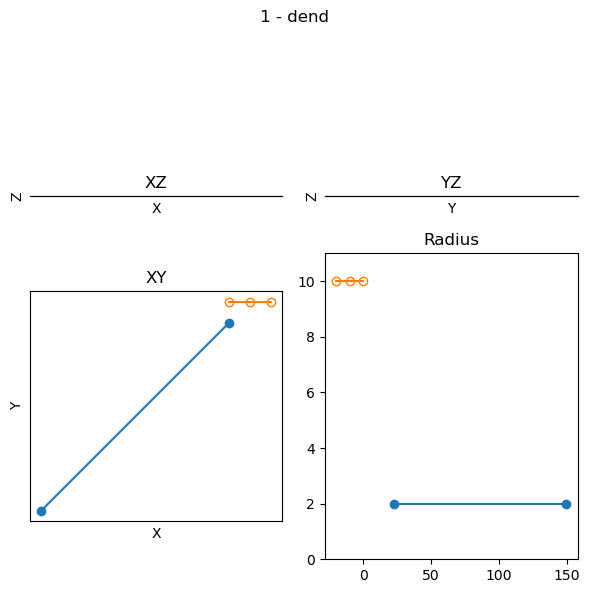

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
selected_section.plot(ax=ax, plot_parent=True, remove_ticks=True);
plt.tight_layout()

As you can see now, we have added a point in the beginning of our section that has the same coordinates as the point from the end of its parent section. And we did this for all points besides the soma children as we assume the soma has some spherical shape and the soma children do not start immediately from the soma center.

In [37]:
sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     0 |   ├─•2
     0 |   └─•3
     3 |     ├─•4
     4 |     │ ├─•5
     4 |     │ └─•6
     3 |     └─•7
     7 |       ├─•8
     7 |       └─•9


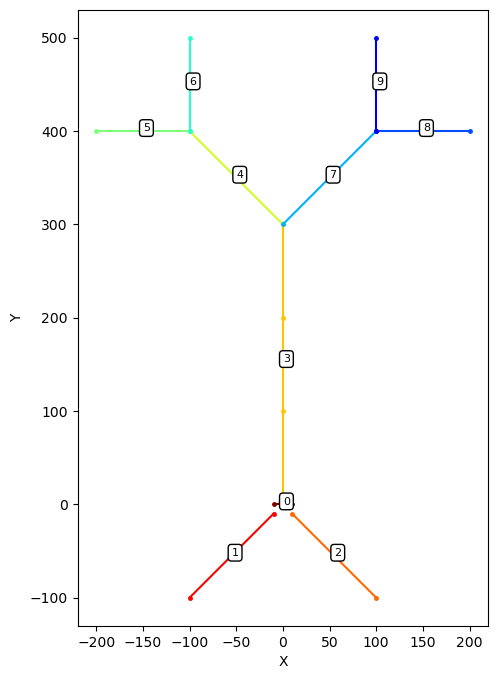

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
sec_tree.plot(ax=ax, show_points=True, show_lines=True, annotate=True, projection='XY')

In [49]:
for sec in sec_tree.sections:
    print(sec.idx, sec.distance_to_root(1))

0 0
1 127.27922061357856
2 127.27922061357856
3 290.0
4 431.4213562373095
5 531.4213562373095
6 531.4213562373095
7 431.4213562373095
8 531.4213562373095
9 531.4213562373095


# Export

In [27]:
file_name = 'ball-and-stick_test.swc'
path_to_output = os.path.join(path_to_swc, file_name)

In [28]:
point_tree.to_swc(path_to_file=path_to_output)

Removed 6 overlapping nodes.
  Elapsed time: 0.0 seconds
Tree already sorted.
  Elapsed time: 0.0 seconds
Extended 6 nodes.
  Elapsed time: 0.0 seconds
